# Cleaning for Clustering & Modelling

## Business Question 8 Preperation

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#set plot sizes
sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

#### Data prep

In [2]:
inter_survey = pd.read_csv('clean_data/international_survey.csv')

In [3]:
inter_survey

,year,country,purpose,mode,duration,age,visits_thousand,nights_thousand,millions_spent
0,2002,USA,Holiday,Air,4-7 nights,0-15,0.270000,1.600000,0.160000
1,2002,USA,Holiday,Air,4-7 nights,16-24,1.080000,4.620000,0.250000
2,2002,USA,Holiday,Air,4-7 nights,25-34,0.990000,5.030000,0.810000
3,2002,USA,Holiday,Air,4-7 nights,45-54,0.350000,1.800000,0.080000
4,2002,USA,Holiday,Air,4-7 nights,65+,1.660000,10.090000,0.620000
...,...,...,...,...,...,...,...,...,...
32044,2019,Argentina,Holiday,Air,15+ nights,65+,1.575168,14.176511,0.897375
32045,2019,Argentina,Other,Air,8-14 nights,25-34,0.631421,3.157103,0.228890
32046,2019,Rest of Latin America,Holiday,Air,8-14 nights,25-34,2.243179,11.633949,0.877631
32047,2019,Rest of Latin America,Holiday,Air,8-14 nights,45-54,0.550858,1.714171,0.135526


In [4]:
inter_survey.country.unique()

array(['USA', 'Canada', 'Belgium', 'France', 'Germany', 'Italy',
       'Netherlands', 'Denmark', 'Spain', 'Portugal', 'Austria', 'Sweden',
       'Former Yugoslavia', 'Switzerland', 'Norway',
       'Gibraltar/Malta/Cyprus', 'Hungary', 'Russia', 'Kuwait',
       'United Arab Emirates', 'Other Gulf States', 'Saudi Arabia',
       'Israel', 'Egypt', 'Other North Africa', 'Nigeria', 'Kenya',
       "Oth.E C'wealth Africa", 'Zimbabwe', 'South Africa', 'Singapore',
       'Thailand', 'Rest of SE Asia', 'Japan', 'Hong Kong', 'Taiwan',
       'India', 'Pakistan', 'China', 'Australia', 'New Zealand', 'Brazil',
       'Mexico', 'Argentina', 'Rest of Latin America',
       "C'wealth Caribbean", 'Greece', 'Irish Republic', 'Iceland',
       'Poland', 'Other E.Europe', "Oth.Non C'Wealth Africa", 'Malaysia',
       'South Korea', 'Rest of Asia', 'Finland', 'Turkey',
       'Czech Republic', 'Other Middle East', "Oth.W C'wealth Africa",
       'Venezuela', 'Non CW C&S America', 'Namibia', 'Luxembou

In [5]:
# get top 10 spenders between each country of origin for tourism
countries_exp = (
    inter_survey.groupby('country')
    .millions_spent
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .copy()
)

top_5_countries = countries_exp.head(5).country.unique().tolist()

countries_exp_by_year = (
    inter_survey.query("country == @top_5_countries")
    .groupby(['country','year'])
    .millions_spent
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .copy()
)

countries_visits = (
    inter_survey.query("country == @top_5_countries")
    .groupby('country')
    .visits_thousand
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
    .copy()
)

countries_visits_by_year = (
    inter_survey.query("country == @top_5_countries")
    .groupby(['country','year'])
    .visits_thousand
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
    .copy()
)

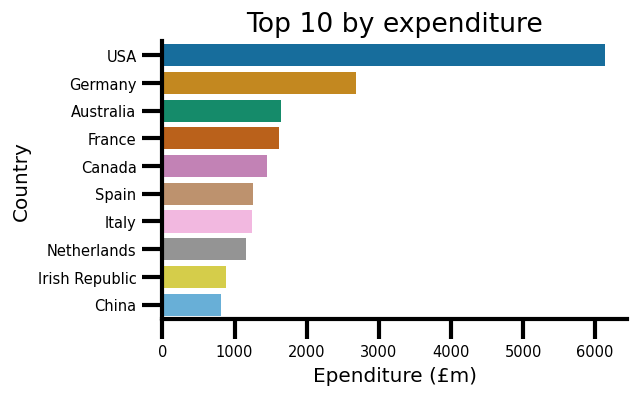

In [6]:
sns.barplot(data = countries_exp.head(10), x='total_expenditure', y='country', palette='colorblind')
sns.despine()
plt.xlabel("Ependiture (£m)" , fontsize = 12)
plt.ylabel("Country", fontsize = 12)
plt.title('Top 10 by expenditure' , fontsize = 16);

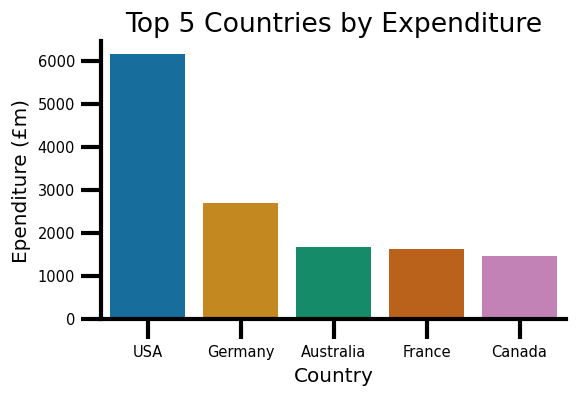

In [7]:
sns.barplot(data = countries_exp.head(5), x='country', y='total_expenditure', palette='colorblind')
sns.despine()
plt.ylabel("Ependiture (£m)" , fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.title('Top 5 Countries by Expenditure' , fontsize = 16);

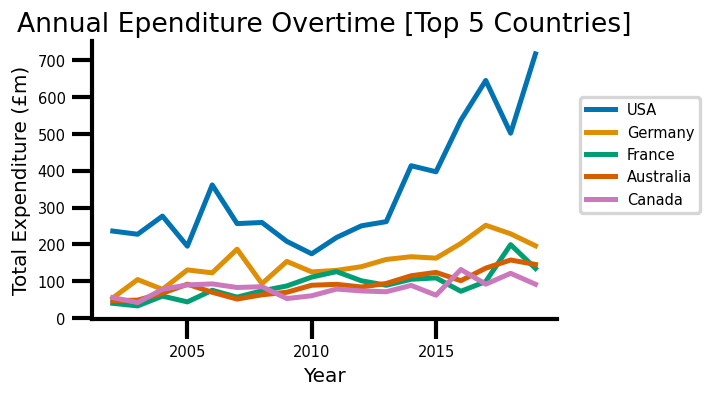

In [8]:
sns.lineplot(data=countries_exp_by_year, x='year', y='total_expenditure', hue='country', palette='colorblind')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.locator_params(axis='x', integer=True)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Expenditure (£m)" , fontsize = 12)
plt.title('Annual Ependiture Overtime [Top 5 Countries]' , fontsize = 16);

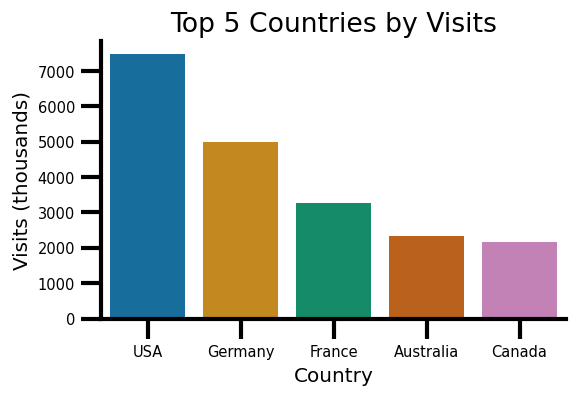

In [9]:
sns.barplot(data = countries_visits, x='country', y='total_visits', palette='colorblind')
sns.despine()
plt.ylabel("Visits (thousands)" , fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.title('Top 5 Countries by Visits' , fontsize = 16);

### Save top 5 to different csv files

In [10]:
countries_exp.head(5).country.unique()

array(['USA', 'Germany', 'Australia', 'France', 'Canada'], dtype=object)

In [11]:
for country in countries_exp.head(5).country.unique():
    inter_survey[inter_survey['country']==country].to_csv(f"clean_data/countries/{country.lower()}.csv", index=False)